## 知的学習システム 課題3
動径基底関数による回帰問題を理解するために実験を行った。<br>
結果を以下にまとめた。

実行結果からN>Mの時により良い近似を行うことができた。
また、Mが大きくなるほどN>Mの時に近似した関数が元の関数に近づいて行った。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

関数を定義

In [2]:
def f(x):
    return -100 * x * (x-0.5)**2 * (x-1)

N個の適当なサンプル点を設定し、観測データ {$x_n, t_n$}を生成

In [3]:
#N=100
xs = np.arange(0, 1.01, 0.02)
ts = f(xs) + np.random.normal(loc=0.0, scale=0.2, size=len(xs))

基底関数$\phi_m(x)$を定義

In [4]:
# φ_m(x)
def gaussian_basis_func(s, mu):
    return lambda x:np.exp(-(x-mu)**2 / s)

def gaussian_basis_funcs(s, mus):
    return [gaussian_basis_func(s, mu) for mu in mus]

計画行列$\Phi$を求め、重み$w$を計算<br>
さらに$w$を用いて関数近似を行う

In [5]:
def RUN(xs, ts, mn):
    # Φ
    s = 0.1
    N = len(xs)  # データの点数
    M = mn  # 基底関数の個数
    xsM = np.arange(0, 1.01, 1.0/(M-1))
    bases = gaussian_basis_funcs(s, xsM)

    def phis(x):
        return np.array([basis(x) for basis in bases])

    PHI = np.array(map(phis, xs))
    PHI.resize(N, M)

    # w
    ws = np.dot(np.dot(np.dot(PHI.T,PHI)**-1, PHI.T), ts)

    # 関数近似
    def approximate():
        S_N_inv = 0.1*np.eye(M) + 9 * np.dot(PHI.T, PHI)
        m_N = 9 * np.linalg.solve(S_N_inv, np.dot(PHI.T, ts))
        
        def function(x):
            Phi_x = phis(x)
            mu = np.dot(m_N.T, Phi_x)
            s2_N = 1.0/9 + np.dot(Phi_x.T, np.linalg.solve(S_N_inv, Phi_x))
            return (mu, s2_N)
        
        return function, m_N, S_N_inv
            
    
    plt.clf()
    plt.axis([-0.05, 1.05, -2.0, 2.0])
    plt.title('N: %d  M: %d' % (N, M))
    
    x_ = np.arange(-0.05, 1.05, 0.01)
    plt.plot(x_, f(x_), color='green')
    
    function, m_N, S_N_inv = approximate()
    y_m = []
    for mu, s2 in map(function, x_):
        s = np.sqrt(s2)
        y_m.append(mu)
        
    plt.plot(x_, y_m, color='red')
    
    plt.scatter(xs, ts, color='blue', marker='o')
    plt.show()

In [6]:
def randidx(n, k):
    r = range(n)
    np.random.shuffle(r)
    return np.sort(r[0:k])

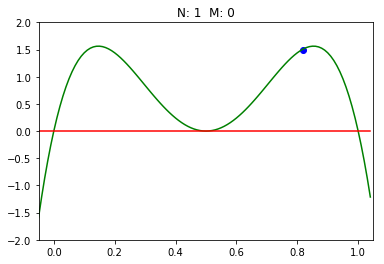

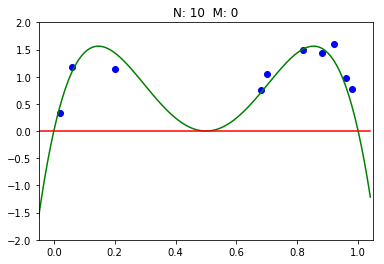

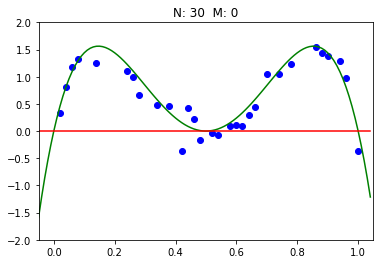

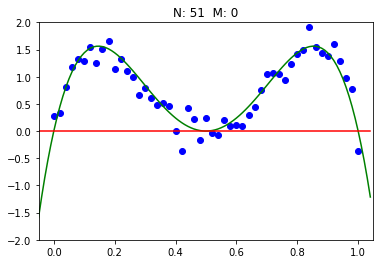

In [7]:
for k in (1, 10, 30, 100):
    indices = randidx(len(xs), k)
    RUN(xs[indices], ts[indices], 0)

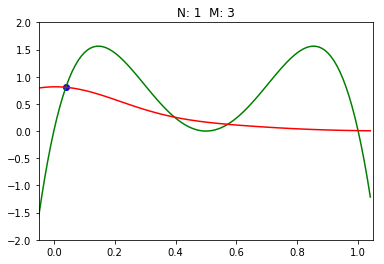

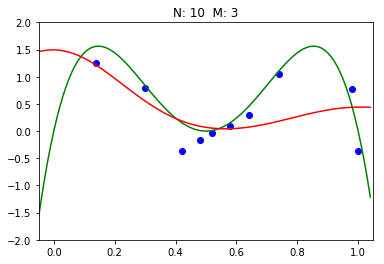

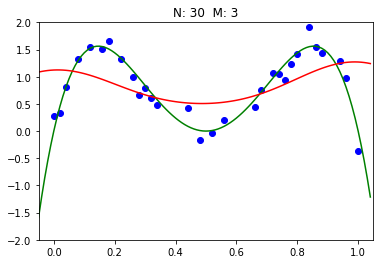

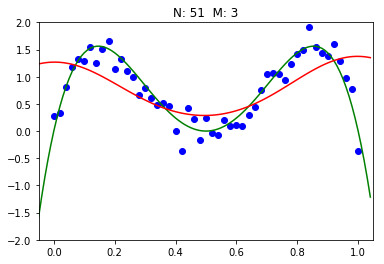

In [8]:
for k in (1, 10, 30, 100):
    indices = randidx(len(xs), k)
    RUN(xs[indices], ts[indices], 3)

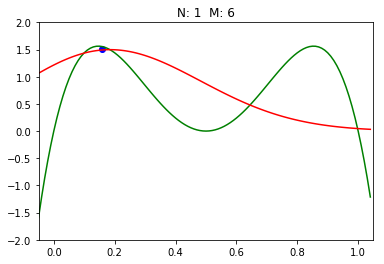

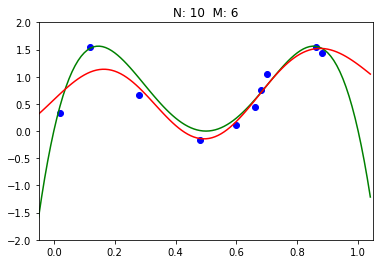

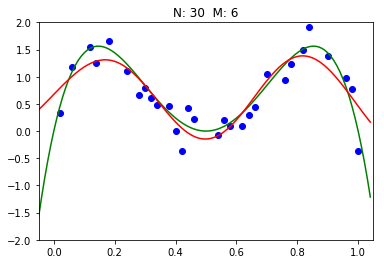

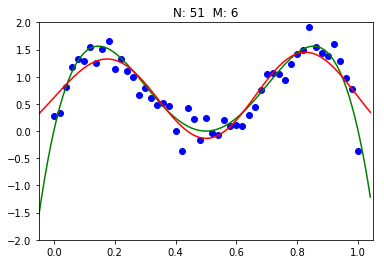

In [9]:
for k in (1, 10, 30, 100):
    indices = randidx(len(xs), k)
    RUN(xs[indices], ts[indices], 6)

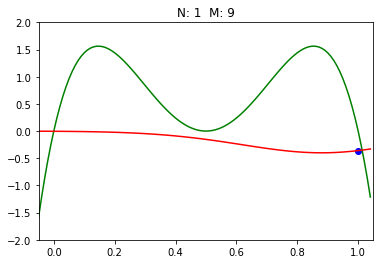

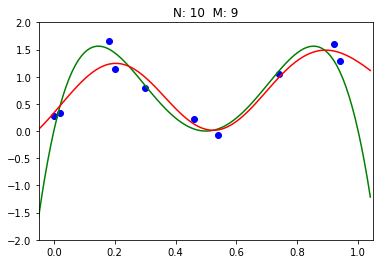

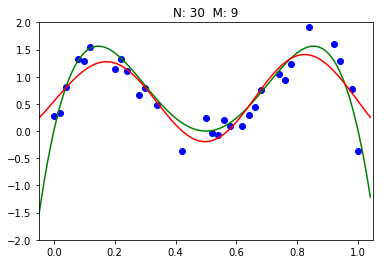

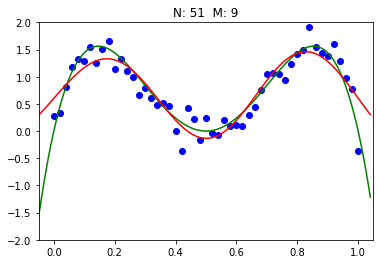

In [10]:
for k in (1, 10, 30, 100):
    indices = randidx(len(xs), k)
    RUN(xs[indices], ts[indices], 9)

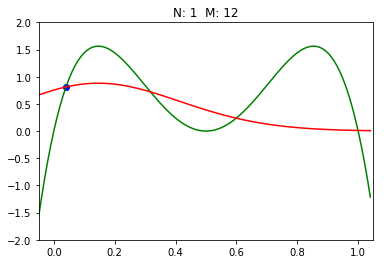

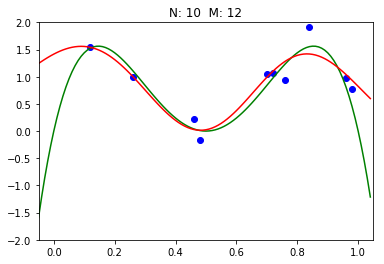

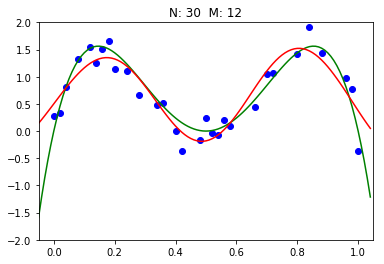

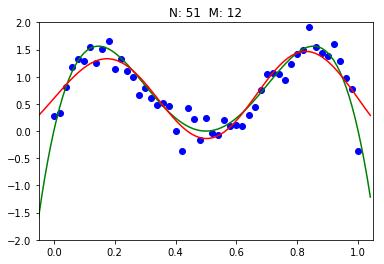

In [11]:
for k in (1, 10, 30, 100):
    indices = randidx(len(xs), k)
    RUN(xs[indices], ts[indices], 12)